\***\*============================GRAPH PREPROCESSING============================**


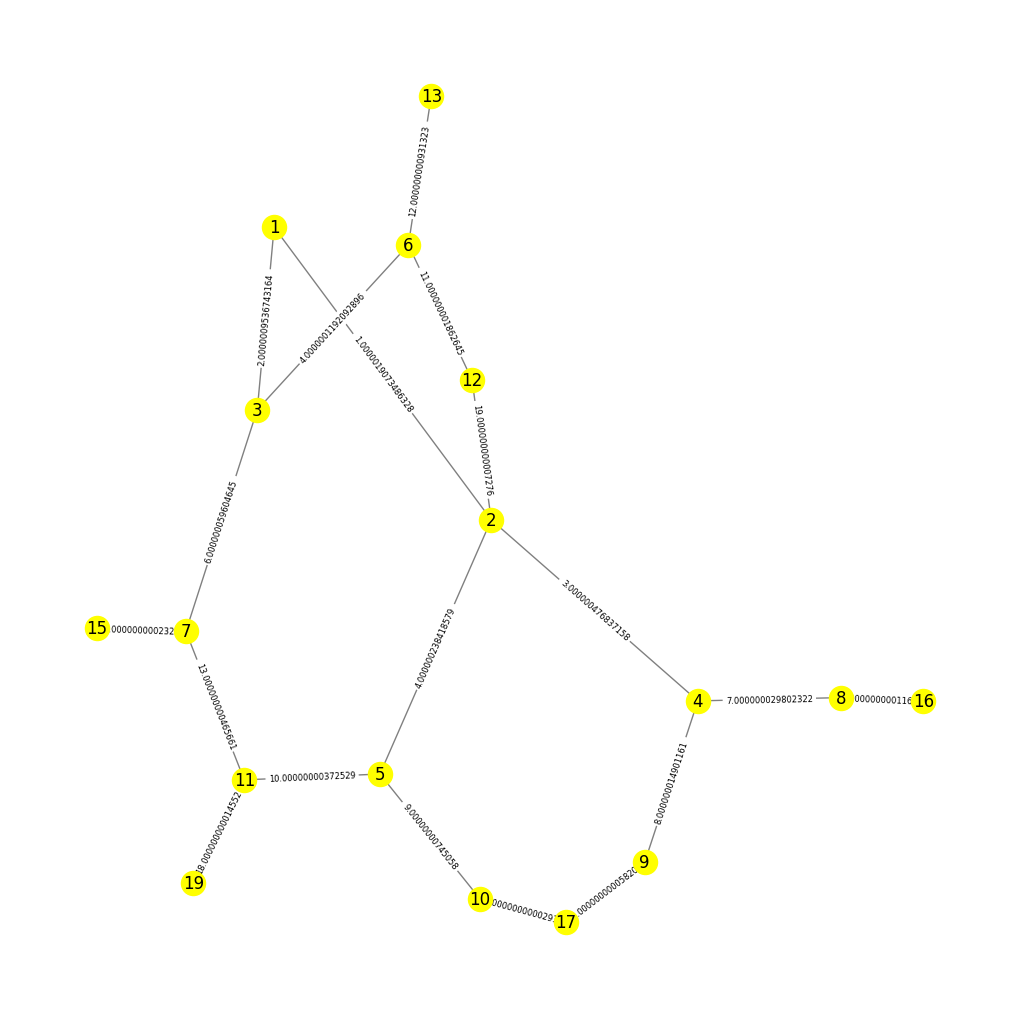

{1: {1: 0, 2: 1.0000019073486328, 3: 2.0000009536743164, 4: 4.000002384185791, 5: 5.000002145767212, 6: 6.000001072883606, 7: 8.000001013278961, 8: 11.000002413988113, 9: 12.000002399086952, 10: 14.000002153217793, 11: 15.000002149492502, 12: 17.00000107474625, 13: 18.00000107381493, 15: 22.000001013511792, 16: 26.00000241410453, 17: 28.00000239914516, 19: 33.000002149507054}, 2: {2: 0, 1: 1.0000019073486328, 4: 3.000000476837158, 3: 3.000002861022949, 5: 4.000000238418579, 6: 7.000002980232239, 7: 9.000002920627594, 8: 10.00000050663948, 9: 11.00000049173832, 10: 13.00000024586916, 11: 14.00000024214387, 12: 18.000002982094884, 13: 19.00000298116356, 15: 23.000002920860425, 16: 25.000000506755896, 17: 27.000000491796527, 19: 32.00000024215842}, 3: {3: 0, 1: 2.0000009536743164, 2: 3.000002861022949, 6: 4.0000001192092896, 7: 6.000000059604645, 4: 6.000003337860107, 5: 7.000003099441528, 8: 13.00000336766243, 9: 14.000003352761269, 12: 15.000000121071935, 13: 16.000000120140612, 10: 16.

In [1]:
# Example usage
import networkx as nx
import matplotlib.pyplot as plt


# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

        
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, weight):
        if u not in self.graph:
            self.graph[u] = {}
        if v not in self.graph:
            self.graph[v] = {}
        self.graph[u][v] = weight
        self.graph[v][u] = weight  # add the edge (v, u) as well

    def get_edge_weight(self, u, v):
        return self.graph.get(u, {}).get(v, self.graph.get(v, {}).get(u, float("inf")))   


def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))


# num_nodes = 10

# Define a small fraction
fraction = []
for i in range(19):
    fraction.append(1/(2 ** (19+i)))

# Generate edges with unique weights
edges = [
    Edge(1, 2, 1 + fraction[0]),
    Edge(1, 3, 2 + fraction[1]),
    Edge(2, 4, 3 + fraction[2]),
    Edge(2, 5, 4 + fraction[3]),
    Edge(3, 6, 4 + fraction[4]),
    Edge(3, 7, 6 + fraction[5]),
    Edge(4, 8, 7 + fraction[6]),
    Edge(4, 9, 8 + fraction[7]),
    Edge(5, 10, 9 + fraction[8]),
    Edge(5, 11, 10 + fraction[9]),
    Edge(6, 12, 11 + fraction[10]),
    Edge(6, 13, 12 + fraction[11]),
    Edge(7, 11, 13 + fraction[12]),
    Edge(7, 15, 14 + fraction[13]),
    Edge(8, 16, 15 + fraction[14]),
    Edge(9, 17, 16 + fraction[15]),
    Edge(10, 17, 17 + fraction[16]),
    Edge(11, 19, 18 + fraction[17]),
    Edge(12, 2, 19 + fraction[18]),
]
G = nx.Graph()

# Add edges to the graph

for edge in edges:
    # print(edge.u, edge.v, edge.weight)
    # sum_weight = sum_weight + int(edge.weight)
    G.add_edge(edge.u, edge.v, weight=edge.weight)
G = G.to_undirected()

# Preprocess the graph
D = preprocess_graph(G)

# Create a new figure with a larger size
plt.figure(figsize=(10, 10))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray"
)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=6)

plt.show()
print(D)


=================================== Distance Oracle =====================================


In [2]:
class DistanceOracle:
    def __init__(self, distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances

    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))

    def __getitem__(self, key):
        return self.data[key]

    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance

    # def add_edge(u, v, weight):
    #     G.add_edge(u, v, weight=weight)

    # def get_edge_weight(G, u, v):
    #     if G.has_edge(u, v):
    #         return G[u][v]['weight']
    #     else:
    #         return None

In [3]:
# Create an instance of
distance_oracle = DistanceOracle(D)

\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [4]:
import networkx as nx

def store_shortest_paths(G):
    shortest_paths = {}
    for u in G.nodes:
        for v in G.nodes:
            if u == v:
                shortest_paths[(u, v)] = [u]
            else:
                try:
                    path = nx.dijkstra_path(G, u, v, weight='weight')
                    shortest_paths[(u, v)] = path
                    # shortest_paths[(v, u)] = path[::-1]  # reverse path for (v, u)
                except nx.NetworkXNoPath:
                    shortest_paths[(u, v)] = None
                    # shortest_paths[(v, u)] = None
    return shortest_paths

shortest_paths = store_shortest_paths(G)

# Now you can access the shortest path between any pair of nodes like this:
print(shortest_paths[(13, 19)])
print(shortest_paths[(19, 13)])  # this will give the reverse of the path from 13 to 19

[13, 6, 3, 1, 2, 5, 11, 19]
[19, 11, 5, 2, 1, 3, 6, 13]


---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [5]:
import math


def nearest_power_of_2(x):
    if x <= 0:
        return 1  # Return 1 for non-positive input
    elif math.isinf(x):
        return float('inf')  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [6]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]

    X.append(x)
    # F = list(F)
    # vertices = [F.u , F.v]

   
    if(nearest_power_of_2(
        distance_oracle.get_distance(x, F[0]))< nearest_power_of_2(distance_oracle.get_distance(x, F[1]))):
            u = F[0]
    else:
        u = F[1]

    
    # u = min(F, key=lambda v: nearest_power_of_2(
    #     distance_oracle.get_distance(x, v)))

    # print(u)

    while True:

        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break

        if y is not None:
            X.append(y)
            x = y
        else:
            break

    return X

In [7]:
m = FINDJUMP([13, 6, 3, 1, 2, 5, 11, 19], [1, 3])
print(m)
# print(narest_power_of_2(37)), {1, 3})


[13, 3, 1, 5, 11, 19]


**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [8]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return float('inf') 

In [9]:



def maximizer(x, y, d1, d2):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distanc_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and it length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i +1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges i edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            #nx.has_path(G, x, u)
            # and nx.has_path(G, y,v)
            # and
            (distance_oracle.get_distance(x, u) >= d1
             and distance_oracle.get_distance(y, v) >=d2)
            or (distance_oracle.get_distance(x, u) >= d2
                and distance_oracle.get_distance(y, v) >=d1)
        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    # print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G, u, v)
        # print(original_weight)

        if G.has_edge(u, v):
            G.remove_edge(u,v )
        # print(f"Removed edge: u} - {v}")

        # Calculate the xy path distance
        D = preprocess_graph(G)

        distance_oracle_new = DistanceOracle(D)

        xy_path = nx.dijkstra_path(G, x, y, weight='weight')
        # print(xy_path)

        max_uv_distance = distance_oracle_new.get_distance(x, y)

        if (max_uv_distance > max_xy_distance):
            max_xy_edge = (u, v)
            max_xy_path = xy_path
            max_xy_distance = max_uv_distance
            
        # Add the (u, v) edge back to the graph
        # G.add_edge(u, v, weight=original_weigh)

        G.add_weighted_edges_from([(u, v, original_weight)])

        D = preprocess_graph(G)

    # print(f"max_xy_path: {max_xy_path}")

    #    distance_oracle=DistanceOracle(D)

    # # chandge max_xy_path to 2D-composable form

    
    
    if max_xy_path is not None:

        s=0
        max_xy_path_new = []

        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i +1]

            uv_distance = distance_oracle.get_distance(u, v)

            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )

            # print(f"uv_distance:{uv_distance}")
            # print(f"uv_distance_path:{uv_distanc_path}")
            # s_to_a_path = [u]
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge  = (v, max_xy_path[i + 2])
                    # print(f"intermediate:{intermediate_edge}")
                    # print(f"i:{i}")
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)

                    s = i + 2

        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])

    return max_xy_edge, max_xy_path_new

In [10]:
maximizer(13, 19, 4, 4)

max_xy_path: [13, 6, 3, 7, 11, 19]


((2, 5), [[13, 7], (11, 19), [19, 19]])

==============================MAXIMIZER Storage=========================================


In [11]:



def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in distance_oracle.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance
print(find_max_distance(G, D))




57.00000074891432


In [12]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = []
i = nearest_power_of_2((max_d_value))

while i >= 1:
    d1_d2_list.append(i)
    i //= 2

In [13]:


# Initialize a dictionary to store the maximizer output
function_dict = {
    'maximizer': maximizer  # Replace 'maximizer' with the actual function name
}
maximizer_dict = {}

# Iterate over all pairs of nodes in the graph
for x in G.nodes:
    for y in G.nodes:
        # if x != y:   we don't want pairs of the same node
        # Iterate over all possible d1 and d2 values
        for d1 in d1_d2_list:
            for d2 in d1_d2_list:
                try:
                    #Call the maximizer function and store the result
                    result = function_dict['maximizer'](x, y, d1, d2)
                    if result is not None:
                        max_edge, max_path =  result
                        # Store the result in the reults dictionary
                        maximizer_dict[(x, y, d1, d2)] = (max_edge, max_path)
                except nx.NetworkXNoPath:
                    print(f"No path betwee {x} and {y}.")
# print(maximizer_dict)

max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_pat

max_xy_path: [3, 7, 11, 5, 2, 4, 9]
max_xy_path: [3, 7, 11, 5, 2, 4, 9]
max_xy_path: None
max_xy_path: None
max_xy_path: [3, 7, 11, 5, 2, 4, 9]
max_xy_path: [3, 7, 11, 5, 2, 4, 9]
max_xy_path: [3, 7, 11, 5, 2, 4, 9]
max_xy_path: [3, 7, 11, 5, 2, 4, 9]
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: None
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: None
max_xy_path: None
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: None
max_xy_path: None
max_xy_path: [3, 7, 11, 5, 10]
max_xy_path: [3, 7, 11, 5, 10]
max_xy

In [14]:
shortest_paths[(1, 16)]

[1, 2, 4, 8, 16]

In [15]:
maximizer_dict[(13, 19, 16, 16)]

((5, 11), [[13, 7], (11, 19), [19, 19]])

===============================MAIN: QUERY FUNCTION====================================


In [16]:
from operator import le
def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1)) and (len(path) < 2 or G.has_edge(path[-2], path[-1]))
def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
def QUERY(s, t, e):
    # Check if the edge e is in the graph
    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        print("The edge to avoid is not in the graph.")
        return [], float('inf')
    if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
        e.u, e.v = e.v, e.u
    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        print("There is no valid path between the source and destination vertices.")
        return [], float('inf')
    # print(f"shortest_paths[(s, t)]={shortest_paths[(s, t)]}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])
    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
    final_shortest_path = []
    shortest_path_distance = float("inf")
    for x in JUMP_st:
        for y in JUMP_ts:
            # print(f"x={x}, y={y}")
            d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
            d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # print(f"e_star={e_star}, xy_e_star={xy_e_star}")
            if xy_e_star is None:
                xy_e_star = []
            elif len(xy_e_star) > 2:
                # Flatten the list of lists
                xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(
                    # print(f"xy_e_star={xy_e_star}")
                    xy_e_star[2][0], xy_e_star[2][1])]
            else:
                xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])]
            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]
            if sx_path is None:
                sx_path = [x]
            if yt_path is None:
                yt_path = [y]
            # P = sx_path + xy_e_star + yt_path
            # P = remove_duplicates(sx_path + xy_e_star + yt_path)
            P = remove_duplicates(sx_path + xy_e_star[1:-1] + yt_path)
            # print(f"P={P}")
            # if is_valid_path(G, P):
            p_distance = sum(get_edge_weight(
                G, P[i], P[i+1]) for i in range(len(P) - 1))
            # print(f"p_distance={p_distance}")
            # else:
            #     p_distance = float('inf')
            # s_u_distance = distance_oracle.get_distance(s, e.u)
            # v_t_distance = distance_oracle.get_distance(e.v, t)
            # u_v_distance = distance_oracle.get_distance(e.u, e.v)
            p_edges = [(P[i], P[i+1]) for i in range(len(P) - 1)]
            if ((e.u , e.v) not in p_edges and (e.v , e.u) not in p_edges ) and p_distance < shortest_path_distance:
                    final_shortest_path = P
                    # print(f"shortest_path1={final_shortest_path}")
                    shortest_path_distance = p_distance
            # print(f"shortest_path1={shortest_path1}")
    return final_shortest_path, shortest_path_distance

==================================== USer Input & FINAL OUTPUT =================================


In [17]:
# Get user input for source and destination vertices
try:
    s, t = map(int, input(
        "Enter source and destination vertices (s t): ").split())
except ValueError:
    print("Invalid input. Please enter two integers separated by a space.")
    exit()
# Get user input for the edge to avoid and its weight
try:
    e_u, e_v = map(int, input(
        "Enter the edge to avoid and its weight (u v): ").split())
except ValueError:
    print("Invalid input. Please enter two integers separated by a space.")
    exit()
# Check if the vertices and the edge exist in the graph
if not (G.has_node(s) and G.has_node(t) and (G.has_edge(e_u, e_v) or G.has_edge(e_v, e_u))):
    print("Invalid input. The vertices or the edge do not exist in the graph.")
    exit()
# Create an Edge object for the edge to avoid
e = Edge(e_u, e_v, distance_oracle.get_distance(e_u, e_v))
# Call the QUERY function with the instance of DistanceOracle
path = QUERY(s, t, e)
# Print the path
if path is None:
    print("No path found.")
else:
    print("Path:", path)

Path: ([13, 6, 3, 7, 11, 19], 53.00000018022547)


**Check Corretness of path between s to t after avoiding edg**


In [18]:

def cross_check(G, s, t, e_u, e_v):
    edge_exists = G.has_edge(e_u, e_v)
    if edge_exists:
        edge_data = G.get_edge_data(e_u, e_v)
        G.remove_edge(e_u, e_v)

    st_path = nx.dijkstra_path(G, s, t, weight='weight')

    # Add the edge back to the graph
    if edge_exists:
        G.add_edge(e_u, e_v, **edge_data)

    return st_path


print(QUERY(13, 19, Edge(6, 3, get_edge_weight(G, 6, 3))))
print(cross_check(G, 13, 19, 6, 3))


print(QUERY(13, 19, Edge(3, 6, get_edge_weight(G, 3, 6))))
print(cross_check(G, 13, 19, 3 , 6))

print(QUERY(13, 19, Edge(1, 3, get_edge_weight(G, 1, 3))))
print(cross_check(G, 13, 19, 1, 3))

print(QUERY(13, 19, Edge(2, 1, get_edge_weight(G, 2, 1))))
print(cross_check(G, 13, 19, 2, 1))

# P = [13, 6, 3, 7, 11, 19]
# p_distance = sum(get_edge_eight(
#                 G, P[i], P[i+1]) fr i in range(len(P) - 1))
# print(p_distance)

([13, 6, 12, 2, 5, 11, 19], 74.00000024495966)
[13, 6, 12, 2, 5, 11, 19]
([13, 6, 12, 2, 5, 11, 19], 74.00000024495966)
[13, 6, 12, 2, 5, 11, 19]
([13, 6, 3, 7, 11, 19], 53.00000018022547)
[13, 6, 3, 7, 11, 19]
([13, 6, 3, 7, 11, 19], 53.00000018022547)
[13, 6, 3, 7, 11, 19]
